In [2]:
import numpy as np
from varname import nameof

# adapted from stack overflow
def bmatrix(a, var_name, exercise=1):
    """Stores in a file a LaTeX bmatrix from a numpy array."""
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join([f"{float(x):.6g}" for x in l.split()]) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    with open(f"./aux-matrices/ex-{exercise}/{var_name}.tex", 'w+') as f:
      f.write('\n'.join(rv))

# 2)

In [3]:
X = np.array([
  [1, 1, 1],
  [1, 2, 1],
  [1, 1, 3],
  [1, 3, 3]
])

Z = np.array([1.4, 0.5, 2, 2.5]).reshape(-1, 1)

bmatrix(X, nameof(X), exercise=2)
bmatrix(Z, nameof(Z), exercise=2)

In [4]:
W = np.linalg.inv(X.T @ X) @ X.T @ Z

bmatrix(W, nameof(W), exercise=2)

In [5]:
x_new = np.array([[1, 2, 3]]).T
bmatrix(x_new, nameof(x_new), exercise=2)
print(x_new)
z_hat = W.T @ x_new
print(f"Prediction: {z_hat}")

[[1]
 [2]
 [3]]
Prediction: [[2.25]]


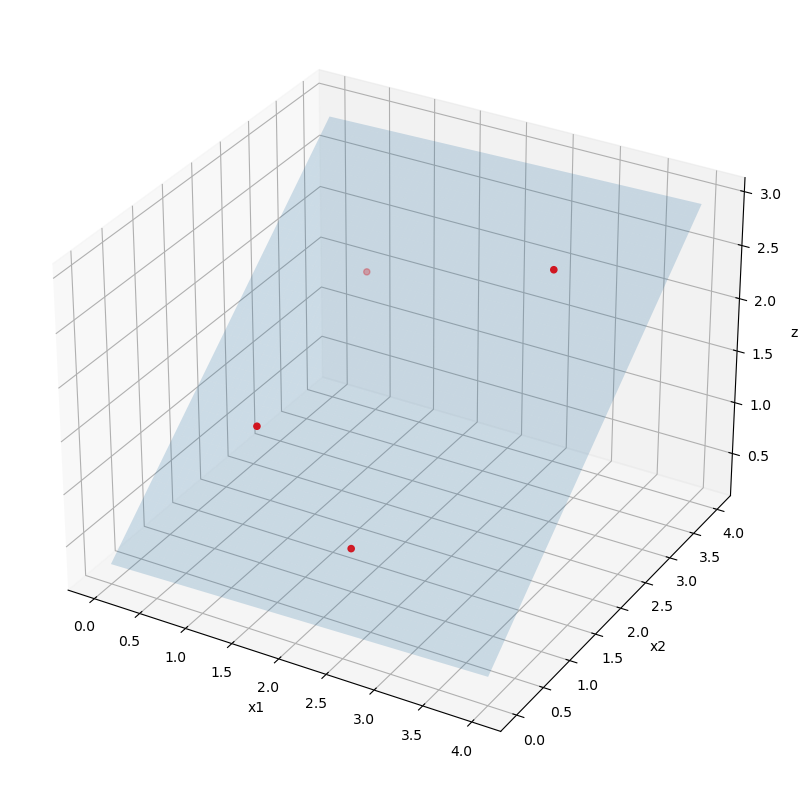

In [6]:
# Plot the linear regression's 3d hyperplane

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X[:, 1], X[:, 2], Z, c='r', marker='o')

# Plot the hyperplane
x1 = np.linspace(0, 4, 100)
x2 = np.linspace(0, 4, 100)
x1, x2 = np.meshgrid(x1, x2)
z = W[1] * x1 + W[2] * x2 + W[0]
ax.plot_surface(x1, x2, z, alpha=0.2)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')

# save the figure as an SVG
plt.savefig('./assets/ex-2/3d-hyperplane.svg', format='svg')
plt.show()

In [8]:
# gather the original samples' estimated values
estimates = X @ W
print(estimates)
bmatrix(estimates, nameof(estimates), exercise=2)

[[0.94]
 [0.96]
 [2.23]
 [2.27]]


In [9]:
mse = np.mean((estimates - Z) ** 2)
print(f"MSE: {mse}")
mae = np.mean(np.abs(estimates - Z))
print(f"MAE: {mae}")

MSE: 0.13224999999999998
MAE: 0.345


In [12]:
LAMBDA = 0.2
W_ridge = np.linalg.inv(X.T @ X + LAMBDA * np.eye(3)) @ X.T @ Z
bmatrix(W_ridge, nameof(W_ridge), exercise=2)

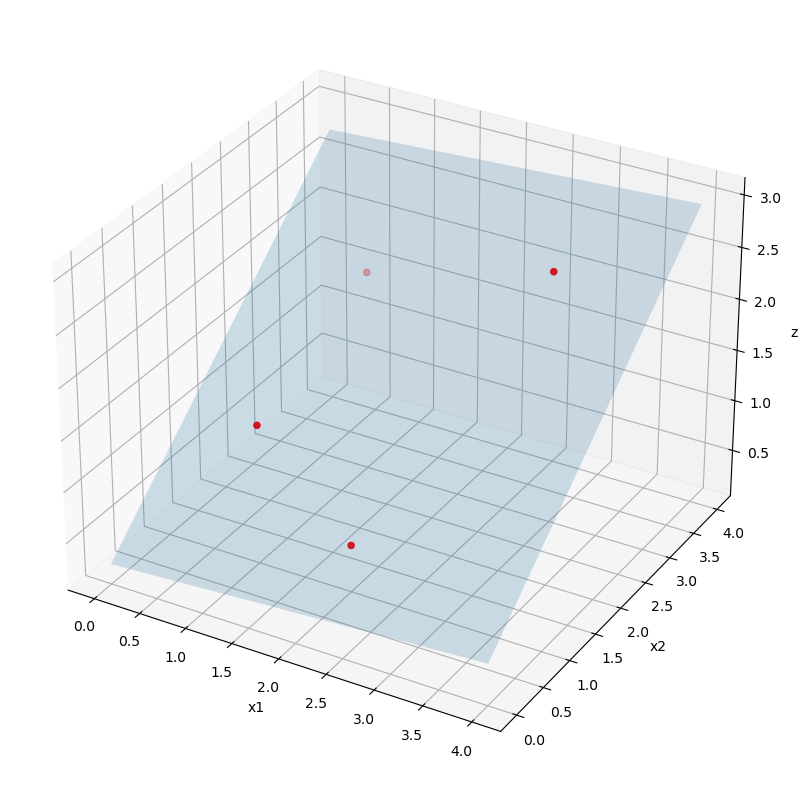

In [13]:
# Plot the ridge regression's 3d hyperplane

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X[:, 1], X[:, 2], Z, c='r', marker='o')

# Plot the hyperplane
x1 = np.linspace(0, 4, 100)
x2 = np.linspace(0, 4, 100)
x1, x2 = np.meshgrid(x1, x2)
z = W_ridge[1] * x1 + W_ridge[2] * x2 + W_ridge[0]
ax.plot_surface(x1, x2, z, alpha=0.2)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')

# save the figure as an SVG
plt.savefig('./assets/ex-2/3d-hyperplane-ridge.svg', format='svg')
plt.show()

In [14]:
# get the norm of the vectors describing the hyperplanes for linear and ridge regression
norm_linear = np.linalg.norm(W)
norm_ridge = np.linalg.norm(W_ridge)
print(f"Norm of the linear regression's hyperplane: {norm_linear}")
print(f"Norm of the ridge regression's hyperplane: {norm_ridge}")

Norm of the linear regression's hyperplane: 0.7014627573863063
Norm of the ridge regression's hyperplane: 0.674861908636186


# 3)

In [16]:
X = np.array([
  [1, 1, 1],
  [1, 2, 1],
  [1, 1, 3],
  [1, 3, 3]
])

Z = np.array([1, 1, 0, 0]).reshape(-1, 1)

bmatrix(X, nameof(X), exercise=3)
bmatrix(Z, nameof(Z), exercise=3)

In [17]:
W = np.linalg.inv(X.T @ X) @ X.T @ Z

bmatrix(W, nameof(W), exercise=3)

In [31]:
OUTPUT_THRESHOLD = 0.5
x_new = np.array([[1, 2, 2.5]]).T

bmatrix(x_new, nameof(x_new), exercise=3)

z_hat = W.T @ x_new
print(f"Estimation: {z_hat}")
print(f"Prediction: {1 if z_hat[0][0] > OUTPUT_THRESHOLD else 0}")

Estimation: [[0.25]]
Prediction: 0
